---

## Week 2 Lecture - Classification Algorithms (Part 1) {-}


### Unit Convenor & Lecturer {-}
[George Milunovich](https://www.georgemilunovich.com)  
[george.milunovich@mq.edu.au](mailto:george.milunovich@mq.edu.au)

### References {-}

1. Python Machine Learning 3rd Edition by Raschka & Mirjalili - Chapter 2
2. Various open-source material

### Week 2 Learning Objectives {-}

- Understanding the Classification Problem
- Binary Classification and Artificial Neurons
- Modelling Binary Classification
- Numpy - Numerical Python library
- The Perceptron Learning Algorithm
    - Implementing Perceptron in Python
    - Visualising Decision Boundries
- Adaptive Linear Neurons - Adaline
    - Minimizing Cost Functions with Gradient Descent
    - Implementing Adaline in Python
    - Hyperparameters
- Improving Gradient Descent
    - Feature Scaling
    - Stochastic Gradient Descent
    - 
    
---

## Artificial Neurons & Binary Classification {-}

**Biological** neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals.


<img src="images/pic1.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic1.png) -->

They are simple logic gates with binary (False/0 or True/1) outputs.   

- If the accumulated signal exceeds a certain **threshold** the output signal (represented as 1 or True) is generated that will be passed on by the axon.  
- This is the basic idea behind a binary classification task.   

**Binary classification** is the task of classifying the elements of a given set into two groups/classes 

- E.g. we could have a **positive class** denoted 1 and a **negative class** denoted -1

Some typical binary classification include   

- Whether a bank customer defaults on a credit card payment   
- Medical testing to determine if a patient has a certain disease or not   
- A "pass or fail" test method or quality control in factories   



---
---

### Binary Classification of the Iris Dataset {-}

In Week 1 Lecture we discussed the Iris [dataset](https://archive.ics.uci.edu/ml/datasets/Iris/). 

It has 4 features on the basis of which we classify and 3 classes defining our label $y$.   
In particular we have,

- $x_1$ - Sepal Length in cm
- $x_2$ - Sepal Width in cm
- $x_3$ - Petal Length in cm
- $x_4$ - Petal Width in cm

- $y=\{$Iris Setosa, Iris Versicolour, Iris Virginica$\}$



Lets load the dataset again and view the dataframe.


In the cell below type in the following:

```
import pandas as pd  # import pandas library 
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing
np.set_printoptions(precision=3, suppress = True)       # format printing to 3 decimal places in numpy


column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class Label']  # define column names
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = column_names) # read data from URL
df.to_excel('data/iris.xlsx')
df.info()
```

We can also check the entire `Datafame` 

```
df
```


In [5]:
import pandas as pd  # import pandas library 
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None) # pretty printing
np.set_printoptions(precision=3, suppress = True)       # format printing to 3 decimal places in numpy


column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class Label']  # define column names
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = column_names) # read data from URL
df.to_excel('data/iris.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class Label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


---
---

Since we currently consider **Binary Classification** lets limit our analysis to two classes 

$y=\left\{ 
\begin{array}{cc}
1 & \text{if versicolor} \\ 
-1 & \text{if setosa} \hfill
\end{array}
\right.$

We will also limit our set of features to    

- $x_1$ - Sepal Length   
- $x_3$ - Petal Length (Lets call this $x_2$ for now for easier notation)   

As seen above setosa and versicolor are contained in rows 0:99. There are 50 rows of setosa and 50 rows of versicolor.  
So we will do the following:

- Create a new DataFrame called df2 that contains rows 0:99   
- Create a new column called $y$ as defined above   
- Export our data from pandas DataFrame into NumPy arrays of y and X   

<hr style="width:25%;margin-left:0;"> 



In the cell below type in the following:

```
df2 = df.loc[0:99, ['Sepal Length', 'Petal Length', 'Class Label']].copy()  # copy selected data into df2
df2['y'] = -1  # create a new variable y and give it values -1 for all observations
df2.loc[df2['Class Label'] == 'Iris-versicolor', 'y'] = 1 # for observations where Class Label == Iris-versicolor set y = 1
df2.head()

y = df2['y'].values
X = df2[['Sepal Length', 'Petal Length']].values

print(type(y), y.shape)
print(type(X), X.shape)

print(y[:10])
print(X[:10,:])
```


In [6]:

df2 = df.loc[0:99, ['Sepal Length', 'Petal Length', 'Class Label']].copy()  # copy selected data into df2
df2['y'] = -1  # create a new variable y and give it values -1 for all observations
df2.loc[df2['Class Label'] == 'Iris-versicolor', 'y'] = 1 # for observations where Class Label == Iris-versicolor set y = 1
df2.head()

y = df2['y'].values
X = df2[['Sepal Length', 'Petal Length']].values

print(type(y), y.shape)
print(type(X), X.shape)

print(y[:10])
print(X[:10,:]) #data from 1 to 10 line, all rows


<class 'numpy.ndarray'> (100,)
<class 'numpy.ndarray'> (100, 2)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]]


---

**Lets now plot the data in a scatter plot**
```
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker='x', label='versicolor')

plt.xlabel ('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')

plt.show()
```

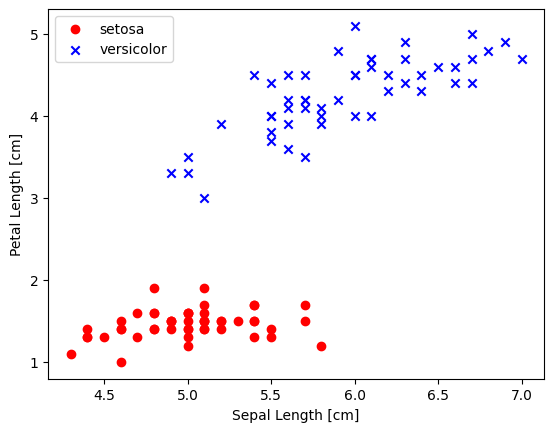

In [7]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker='x', label='versicolor')

plt.xlabel ('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')

plt.show()

---

## Modelling Binary Classification {-}   

So in this situation we wish to predict whether a flower is either a setosa or a versicolor      

$y=\left\{ 
\begin{array}{cc}
1 & \text{if versicolor} \\ 
-1 & \text{if setosa} \hfill
\end{array}
\right.$

on the basis of its two features:

- $x_1$ - Sepal Length   
- $x_2$ - Petal Length   

Now consider predicting $y$ (lets call the prediction $z$) on the basis of $x_1$ and $x_2$ in the context of the linear regression:   

$z=w_0+w_1x_1 +  w_2x_2$,  

- $w_1$ and $w_2$ are estimated coefficients, also called **weights** (beta coefficients in the regression context)   
- $w_0$, i.e. the intercept, is called the **bias unit** in ML literature   


We can see that *z* is not going to be a great predictor of y because *z* is almost never going to be equal to 1 or -1. 

So now we introduce a **decision function** $\phi(z)$ which takes a form of a **unit step function** in the perceptron algorithm:   

<br>

$\phi(z)=\left\{ 
\begin{array}{cc}
1 & \text{if } z \ge 0 \hfill \\ 
-1 & \text{otherwise.}
\end{array}
\right.$

<br>


Using this notation we summarise the model as follows:   


<br>
<hr style="width:50%;margin-left:0;">

$z=w_0 + w_1x_1 +  w_2x_2=\sum_{j=0}^{2}w_jx_j$

$\phi(z)=\left\{ 
\begin{array}{cc}
1 & \text{if } z \ge 0 \hfill \\ 
-1 & \text{otherwise,}
\end{array}
\right.$


<hr style="width:50%;margin-left:0;">

**Summary:** Decision function $\phi(z)$ squashes the net input $z=\sum_{j=0}^{2}w_jx_j$ into a binary output $(-1 \text{ or } 1)$ which can be used to discriminate between **two linearly separable classes**, as shown below.  




<img src="images/pic2.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic2.png) -->

**Remark:** 
The above algorithm will settle on certain values of $w$, i.e. converge, only if the two classes are **linearly separable** 
- Linearly separable means that the classes can be separated by a linear decision boundry 

<img src="images/pic3.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic3.png) -->


<hr style="width:40%;margin-left:0;">

### Summary of the Perceptron {-}

<img src="images/pic4.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic4.png) -->


1. Perceptron receives the inputs of an example, $x$   
2. $x$ is combined with weights $w$ to get net input   
3. Net input is passed on the the threshold function which produces a prediction - class label of +1 or -1   
4. Prediction errors are computed as $y - \phi(z)$   
5. The algorithm learns by updating weights in order to minimise prediction errors   


### Extending Perceptron to a Multi-Class Classification {-}
The `perceptron` algorithm can be extented to multi-class (more than two classes) classification using the **one-vs.-all (OvA)**/**one-vs.rest (OvR)** technique.   

- If there are *N* classes then we train *N* separate classifiers.   
- So we end up with one classifier per class, where a particular class is treated as a positive class and the examples from all other classes are considered negative classes.   
- When classifying an example from a new dataset we would assign the class label that is associated with the largest absolute net input value $z=\sum_{j=0}^{k}w_jx_j$ across all *N* classifiers.   

---

### Implementing Perceptron in Python {-}   

In the following code we crate a class called ```Perceptron```, which is trained using a ```fit``` method, and creates predictions using a ```predict``` method. 
- You are not required to know how to code a perceptron algorithm like this yourselves, but now you should have the ability to read it under understand its building blocks.  

```
import sys
import numpy as np

class Perceptron:
    ''' Perceptron classifier
    
    Parameters: 
    ----------
    eta: learning Rate between 0.0 and 1.0
    n_iter: to go over the training set
    random_state: random number generator seed for random weight initialisation
    
    
    Attributes:
    -----------
    w_ : weights after fitting
    errors_ number of misclassifications in each epoch
    '''
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        ''' Fit training data
    
        Paramters:
        ----------
        X: shape = [number_examples, number_features] - training data
        y: shape = [number_examples] - target values

        Returns:
        --------
        self: object
        '''

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # scale is standard deviation
        self.errors_ = []

        for _ in range(self.n_iter):
            print(f'---------------- Epoch:{_} -----------------')
            errors = 0
            for i, (xi, target) in enumerate(zip(X, y)): # for each row in zip(X,y)
                update = self.eta * (target - self.predict(xi)) # for each row xi
                errors += int(update != 0)
             #   print(f'observation: {i}, x: {xi}, w: {self.w_} y: {target}, prediction: {self.predict(xi)}, update factor: {update}, errors: {errors}')
                self.w_[1:] = self.w_[1:] + update*xi 
                self.w_[0] = self.w_[0] + update  
            self.errors_.append(errors)
        print(len(self.errors_))

        return self
    
    def net_input(self, X):   # X is a row of X
        ''' Calculate net input '''
        return np.dot(X, self.w_[1:]) + self.w_[0]  # np.dot function computes the vector dot (inner) product w'x
    
    def predict(self, X):  # X is a row of X
        ''' Return class label after unit step '''
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    def print_weights(self):
        print(f'Optimized weights: {self.w_}')
```

In [8]:

import sys
import numpy as np

class Perceptron:
    ''' Perceptron classifier
    
    Parameters: 
    ----------
    eta: learning Rate between 0.0 and 1.0
    n_iter: to go over the training set
    random_state: random number generator seed for random weight initialisation
    
    
    Attributes:
    -----------
    w_ : weights after fitting
    errors_ number of misclassifications in each epoch
    '''
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        ''' Fit training data
    
        Paramters:
        ----------
        X: shape = [number_examples, number_features] - training data
        y: shape = [number_examples] - target values

        Returns:
        --------
        self: object
        '''

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # scale is standard deviation
        self.errors_ = []

        for _ in range(self.n_iter):
            print(f'---------------- Epoch:{_} -----------------')
            errors = 0
            for i, (xi, target) in enumerate(zip(X, y)): # for each row in zip(X,y)
                update = self.eta * (target - self.predict(xi)) # for each row xi
                errors += int(update != 0)
             #   print(f'observation: {i}, x: {xi}, w: {self.w_} y: {target}, prediction: {self.predict(xi)}, update factor: {update}, errors: {errors}')
                self.w_[1:] = self.w_[1:] + update*xi 
                self.w_[0] = self.w_[0] + update  
            self.errors_.append(errors)
        print(len(self.errors_))

        return self
    
    def net_input(self, X):   # X is a row of X
        ''' Calculate net input '''
        return np.dot(X, self.w_[1:]) + self.w_[0]  # np.dot function computes the vector dot (inner) product w'x
    
    def predict(self, X):  # X is a row of X
        ''' Return class label after unit step '''
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    def print_weights(self):
        print(f'Optimized weights: {self.w_}')


---


Now that our class is ready we will use it by   

1. Creating an instance of the `Perceptron` class   

```
ppn = Perceptron(eta=0.1, random_state = 1) 

```







In [9]:
ppn = Perceptron(eta=0.1, random_state = 1) 

2. Train the instance on our dataset

```
ppn.fit(X, y)

```

In [10]:
ppn.fit(X, y)

---------------- Epoch:0 -----------------
---------------- Epoch:1 -----------------
---------------- Epoch:2 -----------------
---------------- Epoch:3 -----------------
---------------- Epoch:4 -----------------
---------------- Epoch:5 -----------------
---------------- Epoch:6 -----------------
---------------- Epoch:7 -----------------
---------------- Epoch:8 -----------------
---------------- Epoch:9 -----------------
10


3. Print the trained weights


```
print(ppn.print_weights())

```

In [11]:
print(ppn.print_weights())

Optimized weights: [-0.384 -0.706  1.835]
None


4. Print predictions together with true y and prediction error

```

predictions_df = pd.DataFrame(ppn.predict(X), columns = ['predictions'])

predictions_df[['x1', 'x2']] = X

predictions_df['true_y'] = y

predictions_df['prediction error'] = predictions_df['predictions'] - predictions_df['true_y']

predictions_df.head()

```

In [12]:
predictions_df = pd.DataFrame(ppn.predict(X), columns = ['predictions'])

predictions_df[['x1', 'x2']] = X

predictions_df['true_y'] = y

predictions_df['prediction error'] = predictions_df['predictions'] - predictions_df['true_y']

predictions_df.head()

,predictions,x1,x2,true_y,prediction error
0,-1,5.1,1.4,-1,0
1,-1,4.9,1.4,-1,0
2,-1,4.7,1.3,-1,0
3,-1,4.6,1.5,-1,0
4,-1,5.0,1.4,-1,0


--- 
### Summary {-}   

In the above code we did the following:   

- Initialise a new ```Perceptron``` object, and set eta and random_state   
- ```fit``` method 
    - Initialise the weights by setting them to small random numbers, 
    - Loops over all examples in the training dataset and updates the weights according to the perceptron learning rule   
- Class labels are predicted by the ```predict``` method, which is called in the ```fit``` method, but can also be used to predict class labels of new data   
- Number of misclassifications during each epoch are collected in the ```self.errors_``` list   

---

### Visualising Decision Boundries 

- The code below provides a ``plot_decision_regions`` function to visualise the decision boundries for two-dimensional datasets.   
- In order to use the code we just need to set the values for the following parameters  
    - X
    - y
    - classifier
    

```
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']  # GM: changed this from tuple to list
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
```

In [13]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']  # GM: changed this from tuple to list
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


We will now use the above ```plot_decision_regions``` function to plot our classified data together with decision regions
```
plot_decision_regions(X=X, y=y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()
```

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5244\481453344.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


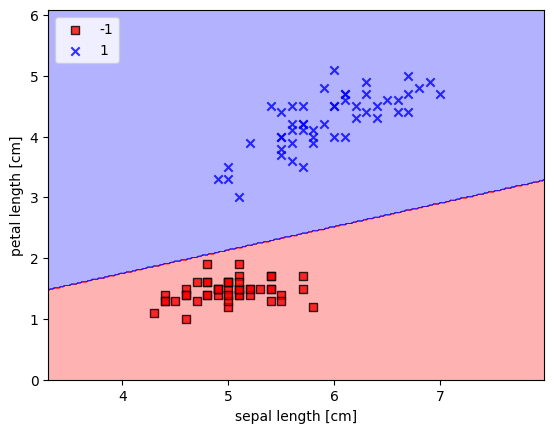

In [14]:
plot_decision_regions(X=X, y=y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

---

### Training a Perceptron with `scikit-learn` {-}    

In practice we will not need to code our algorithms, e.g. `perceptron`, from scratch in Python and NumPy.    

Although a good exercise to gain a better understanding of various algorithms we are not software engineers  
- Our code in the best case scenario will be inefficient, and in the worst case incorrect   

We are going to use [`scikit-learn`](https://scikit-learn.org/stable/) which has many machine learning algorithms programmed in it   
- Scikit-learn is a free software machine learning library for the Python programming language. 
- It contains various classification, regression and clustering algorithms   


Lets try to repeat the previous exercise using `sklearn` Perceptron class   

```
from sklearn.linear_model import Perceptron

ppn2 = Perceptron(eta0=0.1, random_state=1)
ppn2.fit(X, y)

print('--- Estimated Weights ---')
print('intercept:\n', ppn2.intercept_)
print('coefficients:\n', ppn2.coef_)
print(ppn2.predict(X))
```



In [22]:
from sklearn.linear_model import Perceptron

ppn2 = Perceptron(eta0=0.1, random_state=1)
ppn2.fit(X, y)

print('--- Estimated Weights ---')
print('intercept:\n', ppn2.intercept_)
print('coefficients:\n', ppn2.coef_)
print(ppn2.predict(X))

--- Estimated Weights ---
intercept:
 [-0.1]
coefficients:
 [[-0.28  0.7 ]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


--- 

## Adaptive Linear Neurons {-}   

Perceptron can be viewed as a single-layer **neural network**. An extension of the perceptron algorithm is Adaptive Linear Neuron (Adaline)   

### Adaptive Linear Neuron (Adaline) {-}

The **key difference** between the Adaline rule and the Perceptron is that the weights are updated based on a **linear activation function** rather than a unit step function like in the perceptron model.   

- In Adaline the linear activation function $\phi(z)$ is the identity function of the net input $\phi(z)=\phi(\sum_{j=0}^{k}w_jx_j)=\sum_{j=0}^{k}w_jx_j=z$    
- The algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights   
    - In contrast, the perceptron compares the true class labels with the predicted class labels   
- A threshold function is still used to make final predictions (unit step function as in perceptron)   

<img src="images/pic5.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic5.png) -->


---

### Minimizing Cost Functions with Gradient Descent {-}

Model parameters, i.e. elements of the weights vector $w$, are often chosen optimally during the learning process by minimizing an **objective function**. 

- This objective function, also known as the **cost function** - $J(w)$ - is just the **sum of squared errors (SSE)** (we know what this means from the OLS model)   
<br>

$J(w)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\phi(z^{(i)})^2=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-z^{(i)})^2=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\sum_{j=0}^{k}w_jx_j)^2$

<br>

1. $\frac{1}{2}$ is just added for convenience - will make deriving the gradient easier   
2. Main advantage of a linear activation function (in contrast to the unit step function) is that it makes the cost function differentiable -> can compute derivatives analytically    
3. SSE is convex - there is a global cost minimum -> there are optimal weights which minimize the cost function -> use **gradient descent** (optimization algorithm) to find optimal weights   

<img src="images/pic6.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic6.png) -->


- Start with an initial weight $w$   
- Step size determined by the value of the **learning rate**   
- Update weights in the **opposite direction** of the gradient   


In the case of the linear activation function of Adaline the weight update is computed on the basis of all examples (observations) in the training dataset, which is referred to as **batch gradient descent**. 
- Note that in the case of perceptron the updating was done incrementally after each training example.

---
### Implementing Adaline in Python {-}

We can reuse the perceptron code to implement Adaline. 

- Need to do is change the ```fit``` method and add a ```cost_``` attribute.   
- `activation` function is a simple identity function here and it doesn't have an effect on the estimation of the model   
    - It is is used to illustrate the principle of activation function when we employ nonlinear activation functions in later chapters.   


```
class AdalineGD:
    ''' ADaptive LInear NEuron (Adaline) classifier
    
    Paramters: 
    ----------
    eta: learning Rate between 0.0 and 1.0
    n_iter: to go over the training set
    random_state: random number generator seed for random weight initialisation
    
    
    Attributes:
    -----------
    w_ : weights after fitting
    cost_: sum of squares cost function value in each epoch
    '''
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        ''' Fit training data
    
        Paramters:
        ----------
        X: shape = [number_examples, number_features] - training data
        y: shape = [number_examples] - target values

        Returns:
        --------
        self: object
        '''

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # scale is standard deviation
#         self.w_ = rgen.normal(loc=0.0, scale=0.0, size=1 + X.shape[1])  # scale is standard deviation
        
        self.cost_ = []

        for _ in range(self.n_iter):
#             print(f'---------------- Epoch:{_} -----------------')
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
    
        print(self.w_)
        return self
    
    def net_input(self, X):   # X is a row of X
        ''' Calculate net input '''
        return np.dot(X, self.w_[1:]) + self.w_[0]  # np.dot function computes the vector dot (inner) product w'x
    
    def activation(self, X):
        '''Compute linear activation'''
        return X
    
    def predict(self, X):  # X is a row of X
        ''' Return class label after unit step '''
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)
```

Now that we have defined the AdalineGD class we can use it as follows

```
ada = AdalineGD(n_iter=300, eta=0.0001, random_state = 2)

ada.fit(X,y) # function fit will optimise the weights -> find optimal weights 

ada.predict(X)   # function predict will make the prediction given X 
```

---

#### Hyperparameters {-}

The **learning rate** ($\eta$) and the **number of epochs** are **hyperparameters** (tuning parameters) in perceptron (as well as in Adaline below).    
- An **epoch** in machine learning means one complete pass of the training dataset through the algorithm
    - Multiple epochs are often required for the model to converge to a satisfactory level of performance
    - The number of epochs needed can vary significantly depending on the complexity of the model
    - Too few epochs can result in an underfitted model that performs poorly on both training and unseen data
    - Too many epochs can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data
- These parameters are not fitted (estimated) in the same way that the rest of the parameters, i.e. weights, are in the model.   
- **Hyperparamters are usually set by the investigator before the fitting of the model is done.**  
- There are techniques for automatically chosing the values of hyperparameters that produce optimal performance.   
    - We will consider these later in the course.

Note that if the learning rate is too high we may never reach the minimum value of the cost function, as we will overshoot the minimum.  

<img src="images/pic7.png" alt="Drawing" style="width: 450px;"/>

<!-- ![](images/pic7.png) -->


**Learning rates**  

- Can impact the values of optimised parameters 
    - This in turn can impact the forecast accuracy   
- Try several different learning rates   
- If the model is trully optimised (minimum cost function is found) parameters should not change   



---

## Improving Gradient Descent {-}

- Feature Scaling  
- Stochastic Gradient Descent   
- Mini-Batch Gradient Descent  
- Implementing Adaline with Stochastic Gradient Descent  


### Feature Scaling {-}

**Feature Scaling** is method used to transform the range of independent variables or features of data. 

- Feature scaling, e.g. standarization, leads to quicker convergence of optimization algorithms such as gradient descent.  

Feature **standardization** makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 

If $x \sim(\mu, \sigma^2)$ then $z=\frac{x-\mu}{\sigma}$ is distributed as $z\sim(0,1)$

Try the following:


```
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)


print(X_stand[:10])
print(X_stand.mean(axis=0))
print(X_stand.std(axis=0))
```

--- 

Lets compare our old and new data 

```
plt.plot(X)
plt.show()

plt.plot(X_stand)
plt.show()
```

---

Lets train Adaline again on standardized data

```
ada_stand = AdalineGD(n_iter= 200, eta=0.01)
ada_stand.fit(X_stand, y)

# plot_decision_regions(X, y, classifier = ada_stand)
plot_decision_regions(X_stand, y, classifier=ada_stand)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standarized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada_stand.cost_) + 1), ada_stand.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum Squared Errors')
plt.tight_layout()
plt.show()
```

---
### Estimating Linear Regression in Python {-}

Python has several libraries that implement Ordinary Least Square (OLS) method to fitting a linear regression to data.

- `statsmodels` is a libarary that implements many *statistics* and *econometrics* models.   
- Lets use it and estimate a linear regression on our data and confirm that Adaline indeed minimises the Sum of Squred Errors.  

```
import statsmodels.api as sm

X2 = sm.add_constant(X_stand)
print(X2[:10])

model = sm.OLS(y,X2)
results = model.fit()

results.summary()
```

---

### Stochastic Gradient Descent {-}

Previously we considered computing the gradient using the entire training dataset - a method called **batch gradient descent**.  

- In some machine learning applications we have millions of datapoints -> batch gradient descent is computionally costly.  

**Stochastic Gradient Descent (SGD)** (iterative or online gradient descent) updates the weights incrementally for each training example (observation):   

$\Delta w=\eta(y^{(i)} - \phi(z^{(i)})x^{(i)}$

SGD:

- is an approximation of gradient descent   
- typically reaches convergence faster because of more frequent updates  
- does not always converge to global maximum but an area close to it   
- can escape local minima when dealing with nonlinear cost functions  
- useful for dealing with online data where new data arrives in real time e.g. financial data or web applications  

With SGD it is important to:

- use data in a random order  
- shuffle the training dataset for every epoch to prevent cycles  
- don't use a fixed learning rate but rather and adaptive rate decreases over time  

### Mini-Batch Gradient Descent {-}

- Use subsets of training data to compute the gradient, e.g 10 observations at a time.   
- Advantage over gradient descent: convergence is reached faster beause of more frequent weights update.  
